# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 10
### Simulated Annealing

Simulated annealing is a method of numerical optimization that is inspired by an analogy with statistical mechanics and thermodynamics. A system that is cooled slowly freezes and forms a perfect crystal, which is the minimum energy state for the system; so the idea is to take a generic system and use the cost function as Hamiltonian for a statistical mechanic problem, sampling configuration with Metropolis, following the Boltzmann distribution. By changing slowly the value of a fake temperature, the system will find its ground state by itself, mimimizing the *energy*, that is the cost function.  
In a more concrete example, in the TSP problem, already faced in the Exercises09, it is possible to use once again $L^{(2)}$ as the cost function, and sample paths with Metropolis. In this case no population is necessary, only one path is needed, therefore no *Crossover* exists. To sample the new path the genetic moves are proposed and Metropolis accepts or rejects them; more specifically I considered one step as the attempt of proposing each of the four genetic moves available ( in genetic algorithm there were five, but the shift of all cities was useful only if combined with crossover, thus is not implemented here).  
After a number of moves depending on the temperature of the system, the tsystem is cooled a bit and algorithm goes on till very low temperature. The reason why I made steps increase while cooling the system is that ground state is found near *T = 0*, therefore exploring high temperatures is just for being ergodic, but will not give a good value for length. On the contrary while approaching lower *T* it becomes more and more important to sample paths, since the wanted one is *hiding* somewhere in those configuration which are higher likely. In my simulation I lower the temperature by multipling it for a scale factor $t_{incr} = 0.8 $ and contextually increase number of steps for that *T* by $s_{incr} = 100$ (for step increasing is fixed a maximum after which no increase is done ot avoid problems when simulating lots of blocks).  
In the following picture two simulated annealings for the TSP are presented, starting from *T = 15* and *nstep = 100* and for a total of *N = 50* blocks (50 different *T* values), one is with cities displayed on a circumference, and the other with cities inside a square. The pictures show the value of $L^{(2)}$ for the best path as a function of blocks for both simulation. After some blocks both simulation stops improving the path, which probably means that the best one has been found. To check it the paths are drawn below and these pictures confirm what the graphs suggested.

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

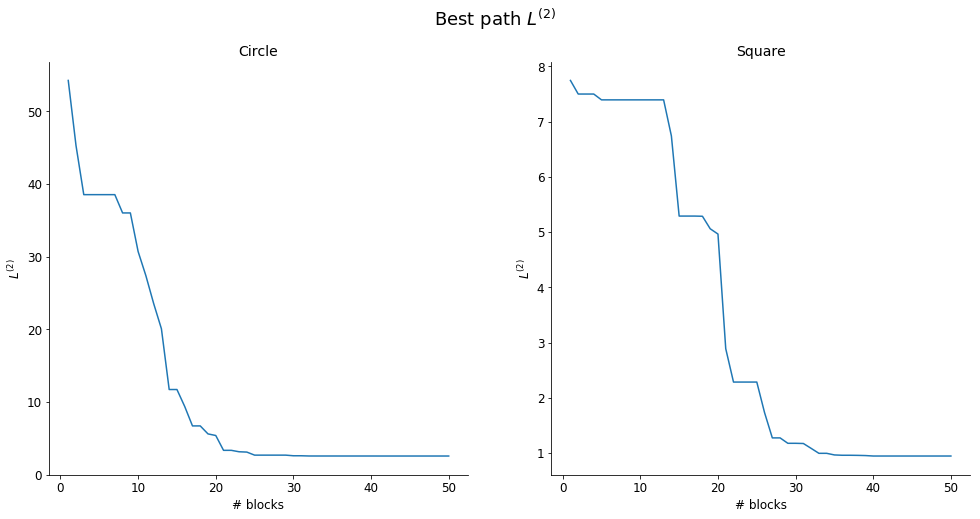

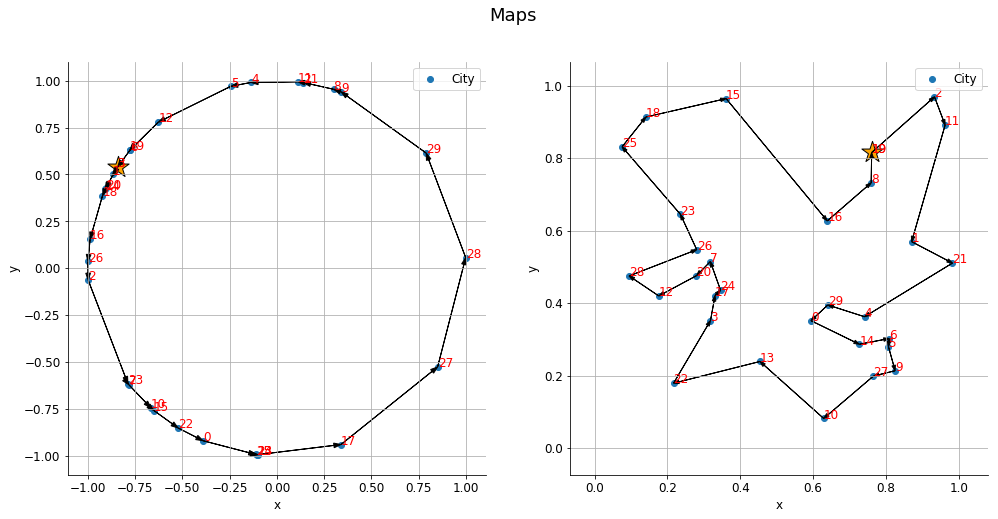

In [2]:
#path length
f, axes = plt.subplots (1,2, figsize=(16.5,7.6))
f.suptitle("Best path $L^{(2)}$")

c_n, c_best = np.loadtxt("Serial/Circle/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)
s_n, s_best = np.loadtxt("Serial/Square/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)

axes[0].plot(c_n, c_best)
axes[1].plot(s_n, s_best)

axes[0].set_title("Circle")
axes[1].set_title("Square")

for i in range (2):
    axes[i].set_xlabel("# blocks")
    axes[i].set_ylabel("$L^{(2)}$")

#path drawings
f, axes = plt.subplots (1,2, figsize=(16.5,7.6))
f.suptitle("Maps")



n, x, y = np.loadtxt("Serial/Circle/best_path.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)

for xs, ys, ns in zip(x, y, n):
    axes[0].text(xs+xs*0.0, ys+ys*0.0, str(int(ns)), color="red", fontsize=12)
    
for i in range (0, x.size-1):
    axes[0].arrow(x[i],y[i], x[i+1]-x[i], y[i+1]-y[i], width= 0.00001, head_width = 0.025, fc='black', length_includes_head=True)

    
axes[0].scatter(x[1:], y[1:], label='City')
axes[0].scatter(x[0], y[0], marker="*", s=500,  c='orange', edgecolors='black')


n, x, y = np.loadtxt("Serial/Square/best_path.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)
for i in range (0, x.size-1):
    axes[1].arrow(x[i],y[i], x[i+1]-x[i], y[i+1]-y[i], width= 0.00001, head_width = 0.01, fc='black', length_includes_head=True)
for xs, ys, ns in zip(x, y, n):
    axes[1].text(xs+xs*0.0, ys+ys*0.0, str(int(ns)), color="red", fontsize=12)

axes[1].scatter(x[1:], y[1:], label='City')
axes[1].scatter(x[0], y[0], marker="*", s=500,  c='orange', edgecolors='black')
axes[1].set_xlim(x.min()*-0.9,x.max()*1.1)
axes[1].set_ylim(y.min()*-0.9,y.max()*1.1)

 
for i in range(2)  :
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()
    axes[i].grid(True)
plt.show()

***Parallel***  
A good way to improve simulation annealing efficience is to run it in parallel, using multiple cores. This allows to have different attempts in searching the ground states simoultaneously and when one simulation may be unlucky there's another which may be not. Below are the pictures of a parallel simulation over 4 cores, each one running an indipendent simulated annealing that after each block communicate to the 0 node who has the best path (lesser length) and how much it is; only at the end of simulation the node with the best path prints it on a file. The results show that at each block parallel simulation has the best path a little bit shorter than the single serial simulation, this is highlithed in the second row of graphs showing the difference between the best paths with two methods block per block. It is important to underline that the results of serial and parallel are comparable since I set the same random seed for both simulation (and for all of the 4 cores) while sampling the random cities, thus the map they work on is the same. For parallel after creating the enviroment the code sets different primes for the cores.  
As usual the last row shows the map with the best path printed. It may be interesting to notice that for the circle serial and parallel have the same path, but from a different starting point and one clockwise and the other counterclockwise, due to the different seed that originates different simulatio; for the square instead the path is not even the same, for the two methods. The parallel one being more ergodic (4 simulations) explores better the phase space and is able to find a better result than the serial, which ends up in a local minimum. 
One way to avoid this problem is trying to be more ergodic with serial simulation, which means starting from a higher temperature where phase space is equally explored. I made a run starting from *T = 35* and with *N = 100* blocks in serial code and actually the best path coincides with the one found with parallel. The length of this path is printed below with the others.

Circle bests
Serial =  2.597119091468699 , Parallel =  2.597119091468699

Square bests
Serial =  0.9454859133408107 , Parallel =  0.9400760969366743

Serial Square from T = 35, N = 100  0.9400760969366743


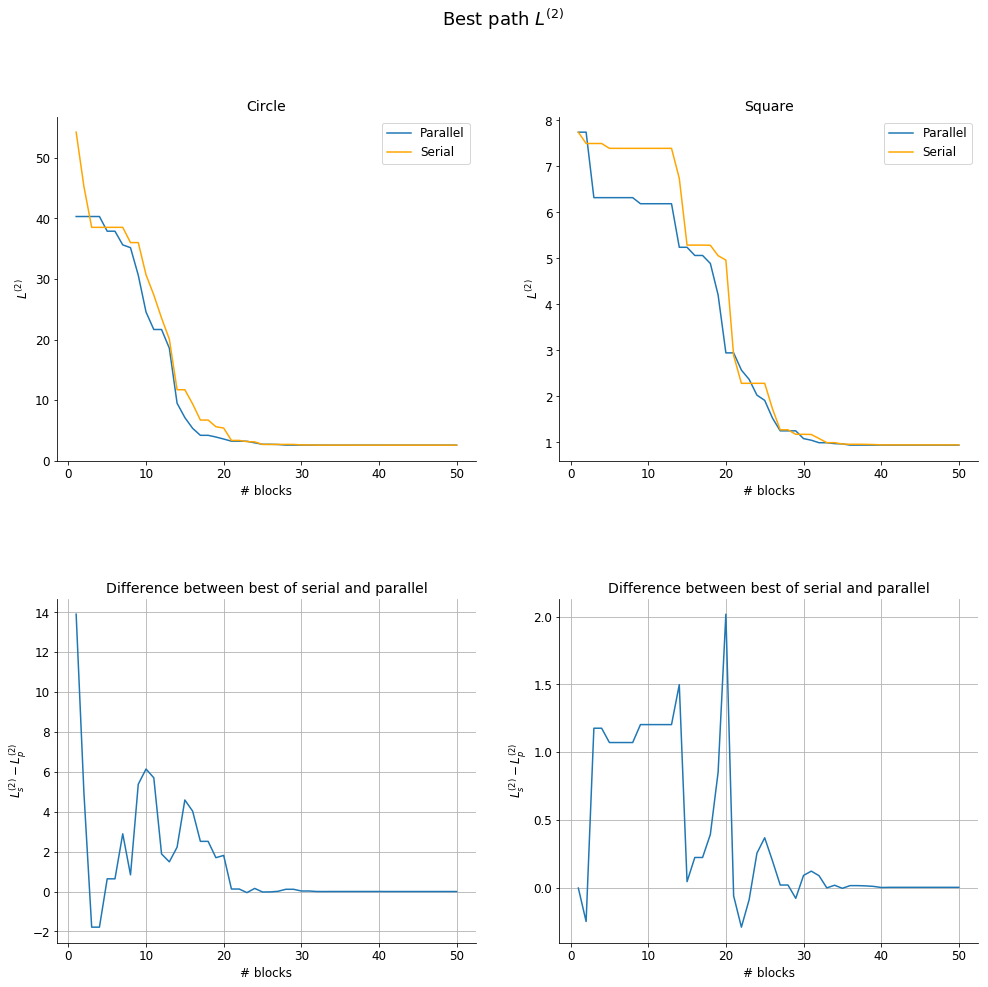

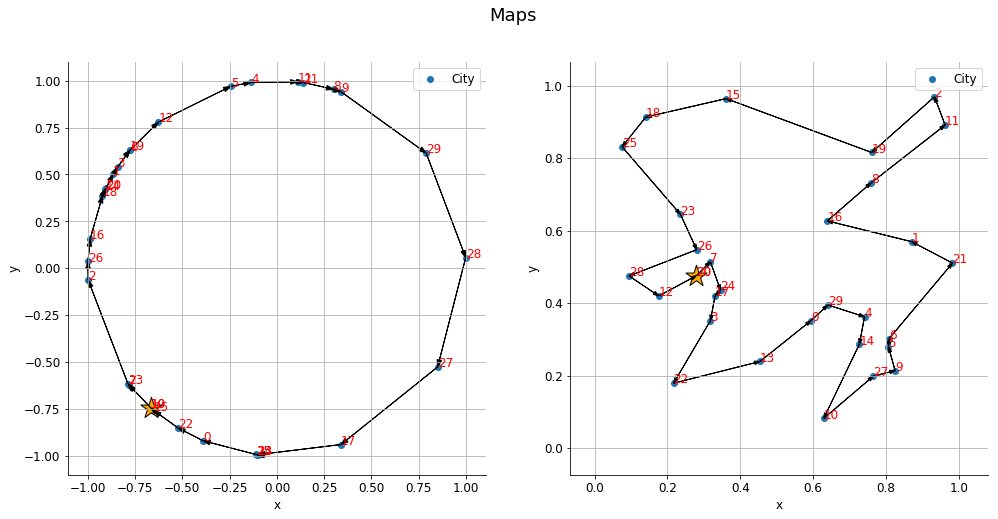

In [3]:
#path length
f, axes = plt.subplots (2,2, figsize=(16.5,15.2))
f.suptitle("Best path $L^{(2)}$")

c_n, c_best = np.loadtxt("Parallel/Circle/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)
s_n, s_best = np.loadtxt("Parallel/Square/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)

axes[0,0].plot(c_n, c_best, label='Parallel')
axes[0,1].plot(s_n, s_best, label='Parallel')

axes[0,0].set_title("Circle")
axes[0,1].set_title("Square")

sc_n, sc_best = np.loadtxt("Serial/Circle/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)
ss_n, ss_best = np.loadtxt("Serial/Square/best_length.out", usecols=(0, 2), delimiter="\t", unpack=True)

axes[0,0].plot(sc_n, sc_best, c='orange', label='Serial')
axes[0,1].plot(ss_n, ss_best, c='orange', label='Serial')


axes[1,0].plot(sc_n, sc_best-c_best)
axes[1,1].plot(ss_n, ss_best-s_best)

print ("Circle bests")
print ("Serial = ", sc_best[-1], ", Parallel = ", c_best[-1])
print()

print ("Square bests")
print ("Serial = ", ss_best[-1], ", Parallel = ", s_best[-1])
print()

ss_long = np.loadtxt("Serial/High_T/best_length.out", usecols=(2), delimiter="\t")
print("Serial Square from T = 35, N = 100 ", ss_long[-1] )
for i in range (2):
    for j in range(2):
        axes[i, j].set_xlabel("# blocks")
        axes[0,j].set_ylabel("$L^{(2)}$")
        axes[1,j].set_ylabel("$L_s^{(2)}-L_p^{(2)}$")
        axes[1,j].set_title("Difference between best of serial and parallel")
        axes[0,j].legend()
        axes[1,j].grid(True)

#path drawings
f, axes = plt.subplots (1,2, figsize=(16.5,7.6))
f.suptitle("Maps")



n, x, y = np.loadtxt("Parallel/Circle/best_path.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)

for xs, ys, ns in zip(x, y, n):
    axes[0].text(xs+xs*0.0, ys+ys*0.0, str(int(ns)), color="red", fontsize=12)
    
for i in range (0, x.size-1):
    axes[0].arrow(x[i],y[i], x[i+1]-x[i], y[i+1]-y[i], width= 0.00001, head_width = 0.025, fc='black', length_includes_head=True)

    
axes[0].scatter(x[1:], y[1:], label='City')
axes[0].scatter(x[0], y[0], marker="*", s=500,  c='orange', edgecolors='black')


n, x, y = np.loadtxt("Parallel/Square/best_path.out", usecols=(0, 1, 2), delimiter="\t", unpack=True)
for i in range (0, x.size-1):
    axes[1].arrow(x[i],y[i], x[i+1]-x[i], y[i+1]-y[i], width= 0.00001, head_width = 0.01, fc='black', length_includes_head=True)
for xs, ys, ns in zip(x, y, n):
    axes[1].text(xs+xs*0.0, ys+ys*0.0, str(int(ns)), color="red", fontsize=12)

axes[1].scatter(x[1:], y[1:], label='City')
axes[1].scatter(x[0], y[0], marker="*", s=500,  c='orange', edgecolors='black')
axes[1].set_xlim(x.min()*-0.9,x.max()*1.1)
axes[1].set_ylim(y.min()*-0.9,y.max()*1.1)

 
for i in range(2)  :
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")
    axes[i].legend()
    axes[i].grid(True)
plt.show()